# Minimum Spanning Tree of a graph using Prim's Algorithm
<br/><span style="font-size: 1rem">What is a minimum spanning tree?</span><br/>
<span style="font-size: 1rem">A minimum spanning tree (MST) is a subset of the edges of a connected, weighted graph that connects all the vertices together without any cycles and with the minimum possible total weight of edges.</span>
***
## Wrapper Class for Graph Visualization

In [1]:
import networkx as nx 
import matplotlib.pyplot as plt 

# Defining a Class 
class GraphVisualization: 

    def __init__(self, weighted, edge_list = [], adjacency_matrix = [], isDirected = False, useAlphabets = False): 
        self.weighted = weighted
        self.G = (nx.DiGraph() if isDirected else nx.Graph())
        
        if len(edge_list) > 0:
            for i in edge_list:
                self.G.add_edge(i[0], i[1], weight = i[2])
        
        elif len(adjacency_matrix) > 0:
            for i in range(len(adjacency_matrix)):
                for j in range(len(adjacency_matrix[i])):
                    if adjacency_matrix[i][j] <= 0: continue
                    if useAlphabets:
                        self.G.add_edge(chr(i+97), chr(j+97), weight = adjacency_matrix[i][j])
                    else: self.G.add_edge(i, j, weight = adjacency_matrix[i][j])
        
        elif len(edge_list) == 0 and len(adjancency_matrix) == 0:
            raise Exception("I expect atleast an edge-list or an adjancency matrix")
    
    # In visualize function G is an object of 
    # class Graph given by networkx G.add_edges_from(visual) 
    # creates a graph with a given list 
    # nx.draw_networkx(G) - plots the graph 
    # plt.show() - displays the graph 
    def visualize(self):
        pos = nx.spring_layout(self.G, scale = 5000)

        # Manually scale up the positions for more spacing
        for key in pos:
            pos[key] *= 10000
        nx.draw_networkx(self.G, pos, node_size=700, node_color='#00ccff', font_size=10)

        if self.weighted:
            # Draw edge labels for weights
            labels = nx.get_edge_attributes(self.G, 'weight')
            nx.draw_networkx_edge_labels(self.G, pos, edge_labels=labels)
        plt.show()

## Function to convert from edge-list to adjancency-matrix

In [2]:
def edge_list_to_adjacency_matrix(edge_list, num_vertices, directed=False):
    # Initialize an n x n matrix with all 0's
    adj_matrix = [[0 for _ in range(num_vertices)] for _ in range(num_vertices)]
    
    # Iterate through each edge in the edge list
    for edge in edge_list:
        u, v = edge[:2]  # Get the vertices of the edge
        adj_matrix[u][v] = edge[2]  # Mark edge u -> v with 1 (or edge weight if any)
        
        if not directed:
            adj_matrix[v][u] = edge[2]  # For undirected graphs, also mark edge v -> u
        else: adj_matrix[v][u] = -edge[2]
    
    return adj_matrix

In [3]:
adjacency_matrix_ = [
    [0, 1, 6, 5, 0, 0, 0, 0, 0],
    [1, 0, 6, 0, 0, 0, 0, 0, 0],
    [6, 6, 0, 0, 7, 3, 0, 0, 0],
    [5, 0, 0, 0, 0, 2, 10, 0, 0],
    [0, 0, 7, 0, 0, 0, 0, 12, 0],
    [0, 0, 3, 2, 0, 0, 0, 8, 0],
    [0, 0, 0, 10, 0, 0, 0, 7, 3],
    [0, 0, 0, 0, 12, 8, 7, 0, 8],
    [0, 0, 0, 0, 0, 0, 3, 8, 0]
]

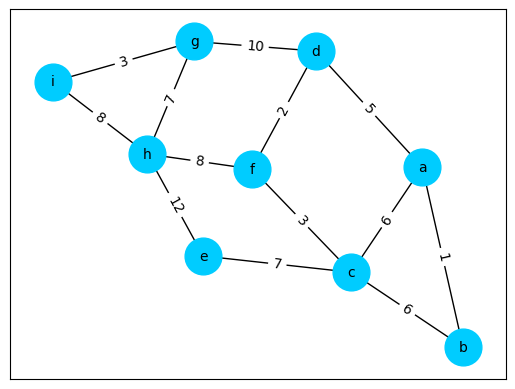

In [4]:
G = GraphVisualization(weighted = True, adjacency_matrix = adjacency_matrix_, useAlphabets = True)
G.visualize()

***
# Algorithm
1. <span style="font-size: 1rem">Determine an arbitrary vertex as the starting vertex of the MST.</span>
2. <span style="font-size: 1rem">Find edges connecting any tree vertex with the vertices that are not included in the MST (known as fringe vertex).</span>
3. <span style="font-size: 1rem">Find the minimum among these edges.</span>
4. <span style="font-size: 1rem">Add the chosen edge to the MST if it does not form any cycle.</span>
5. <span style="font-size: 1rem">Follow steps 2 to 4 until there are no fringe vertices left.</span>
6. <span style="font-size: 1rem">Return the MST and exit.</span>

<span style="font-size: 1rem">
<b>Note:</b> This algorithm works for undirected graphs only.
</span>

***
## Solution class

In [5]:
class Solution:
    def __init__(self):
        self.v_list = []
        self.edgeList = []
    
    def Prim_MST(self, adj_matrix, start = 0):
        i = start
        n = len(adj_matrix)
        self.v_list.append(i)
        while i < n:
            t_v_list = [adj_matrix[i][x] for x in range(n) if adj_matrix[i][x] != 0 and x not in self.v_list]
            if len(t_v_list) == 0: break
            min_edge = adj_matrix[i].index(min(t_v_list))
            self.v_list.append(min_edge)
            i = min_edge
        self.create_edge_list(adj_matrix)
    
    def create_edge_list(self, adj_matrix):
        for i in range(len(self.v_list) - 1):
            current_vertex = self.v_list[i]
            next_vertex = self.v_list[i + 1]
            if i == 0:
                self.edgeList.append((chr(current_vertex + 97), chr(next_vertex + 97), adj_matrix[current_vertex][next_vertex]))
            else:
                c_cost = adj_matrix[current_vertex][next_vertex]
                # check if a previously visited vertex has a direct edge towards the current vertex
                # which is cheaper than the current edge
                
                for j in range(i):
                    cost = adj_matrix[self.v_list[j]][next_vertex]
                    if cost != 0 and c_cost > cost:
                        current_vertex = self.v_list[j]
                self.edgeList.append((chr(current_vertex + 97), chr(next_vertex + 97), adj_matrix[current_vertex][next_vertex]))

In [6]:
s = Solution()
s.Prim_MST(adjacency_matrix_, start = 1); print(s.v_list)

[1, 0, 3, 5, 2, 4, 7, 6, 8]


In [7]:
for edge in s.edgeList:
    print(f'{edge[0]} -- {edge[2]} --> {edge[1]}')

b -- 1 --> a
a -- 5 --> d
d -- 2 --> f
f -- 3 --> c
c -- 7 --> e
f -- 8 --> h
h -- 7 --> g
g -- 3 --> i


## Final minuimum spanning tree

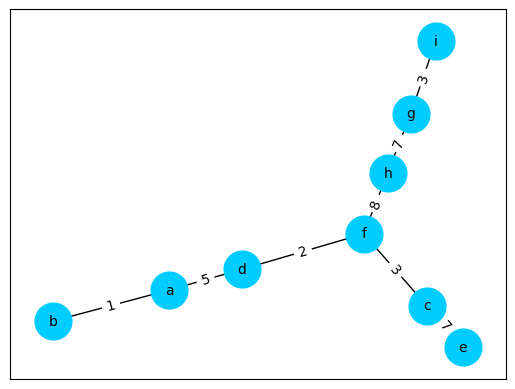

In [10]:
G1 = GraphVisualization(weighted = True, edge_list = s.edgeList)
G1.visualize()

In [13]:
print(f"Total cost of Tree = {sum([i[2] for i in s.edgeList])}")

Total cost of Tree = 36


**Note:** A graph can have more than 1 minimum spaning tree.
***